In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
# import svgutils
# from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
from esploco import esploco
setFont('inter', 6)
plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/sangyuxu/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20250212/'
figurepath = imagepath + '/FigureS1/'

with open(picklepath + 'TrhCsChF_ele.pickle', 'rb') as f:
            TrhCsChF_ele = pickle.load(f)
with open(picklepath + 'TrhACRF_ele.pickle', 'rb') as f:
            TrhACR1F_ele = pickle.load(f)    
with open(picklepath + 'R50H05CsChF_ele.pickle', 'rb') as f:
            R50CsChF_ele = pickle.load(f)


TrhCsChF = pd.read_csv(picklepath + 'TrhCsChF_ele.csv').sort_values(by = ['Light', 'Status'])
R50CsChF = pd.read_csv(picklepath + 'R50H05CsChF_ele.csv').sort_values(by = ['Light', 'Status'])
TrhACRF = pd.read_csv(picklepath + 'TrhACRF_ele.csv').sort_values(by = ['Light', 'Status'])
for df in [TrhCsChF, R50CsChF, TrhACRF]:
    df['Volume'] = df['Volume']*1000
    df['Meal Size'] = df['Meal Size']*1000
    df['Feed Speed'] = df['Feed Speed']*1000
cm = TrhCsChF_ele.cm

# %run '/Users/sangyuxu/Documents/GitHub/Holophenotype5HT/nbs/02_helper/Gdocs API/writepdtogoogledocs.ipynb'
# SPREADSHEET_ID = '1nbr_gWwmOcVY252Tur-fOhx1UDA4IyAfWXCnzwCxGYo'


/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_68352/1444921654.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_68352/1444921654.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [6]:
TrhCsChF['GenoReduced'] = TrhCsChF.Genotype.replace({'trh-gal4>uas-chrimson':'Trhn>Chr', 'w1118; uas-cschrimson':'Chr/w', 'w1118; trh-gal4':'Trhn/w'}).astype('category').cat.set_categories(['Chr/w', 'Trhn/w', 'Trhn>Chr'], ordered=True)
R50CsChF['GenoReduced'] = R50CsChF.Genotype.replace({'r50h05-gal4>uas-cschrimson':'R50H05>Chr', 'w1118; uas-cschrimson':'Chr/w', 'w1118; r50h05-gal4':'R50H05/w'}).astype('category').cat.set_categories(['Chr/w', 'R50H05/w', 'R50H05>Chr'], ordered=True)
TrhACRF['GenoReduced'] = TrhACRF.Genotype.replace({'trh-gal4>uas-acr1':'Trhn>ACR1', 'w1118; uas-acr1':'ACR1/w', 'w1118; trh-gal4':'Trhn/w'}).astype('category').cat.set_categories(['ACR1/w', 'Trhn/w', 'Trhn>ACR1'], ordered=True)

trhcschpalette = {'Trhn>Chr':'orangered', 'Chr/w':'gray', 'Trhn/w':'k'}
r50cschpalette = {'R50H05>Chr':'orangered', 'Chr/w':'gray', 'R50H05/w':'k'}
trhacrpalette = {'Trhn>ACR1':'seagreen', 'ACR1/w':'gray', 'Trhn/w':'k'}



In [7]:


def plotcontrast(data, metric, subdatafilename, palette, title, swarm_label ='Total Volume (nL)', swarm_ylim = [-10, 900],order = [0,1,2]):
    subdata = data[['GenoReduced', 'Status','Light', metric]].rename(columns = {'GenoReduced':'Genotype'}).reset_index()
    c = dabest.load(subdata, x = ['Status', 'Genotype'], y =  metric, delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
    f = c.mean_diff.plot(contrast_bars_kwargs= {'alpha':.05},  swarm_bars_kwargs={'alpha':.05},
                         raw_marker_size=.4, es_marker_size= 5, swarm_desat = 1,color_col='Genotype', 
                         custom_palette= palette, fig_size=(4.5, 4), swarm_ylim= swarm_ylim, swarm_label=swarm_label)
    f.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
    
    f.axes[0].legend(frameon=False,loc='right', fontsize= 9, markerscale =.5, )
    leg = f.axes[0].get_legend()
    # hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
    # hl_dict['_child0'].set_color(palette[subdata['Genotype'].unique()[order[0]]])
    # hl_dict['_child1'].set_color(palette[subdata['Genotype'].unique()[order[1]]])
    # hl_dict['_child2'].set_color(palette[subdata['Genotype'].unique()[order[2]]])
    
    if data.Starvation.unique()[0]==24:
        bgc = 'steelblue'
    else:
        bgc = 'orange'
    f.suptitle(title,  font = 'inter', style='italic', weight = 'medium', fontsize = 20,color= bgc, y=.97)
    f.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
    f.axes[1].set_ylabel(r'$\Delta$ Volume (nL)')
    f.savefig(figurepath+  subdatafilename + '.svg')
    subdata.to_csv(figurepath+  subdatafilename + '.csv')
    return f, c


1


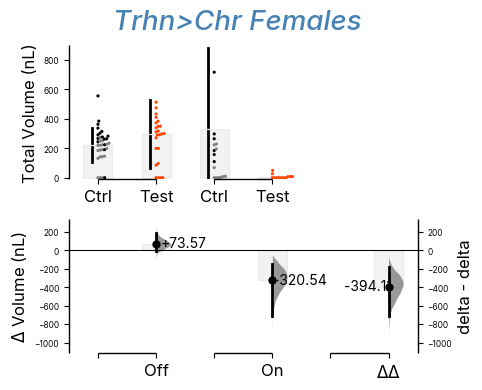

In [ ]:
fTrhCsChF_Vcontrast, TrhCsChF_Vcontrast = plotcontrast(TrhCsChF, 'Volume', 'TrhCsChF_Vcontrast', palette = trhcschpalette, title= 'Trhn>Chr Females')

TrhCsChF_Vcontrast_table = make_delta2_results(TrhCsChF_Vcontrast, 'w/Trhn-Gal4, w/UAS-Chrimson', 'Trhn-Gal4>UAS-Chrimson')
# write_results_table(SPREADSHEET_ID, 'Figure S1A Trhn>Chrimson Female', TrhCsChF_Vcontrast_table, sheet = 'Figure S1', starting_row = None)


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 2.8% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


6


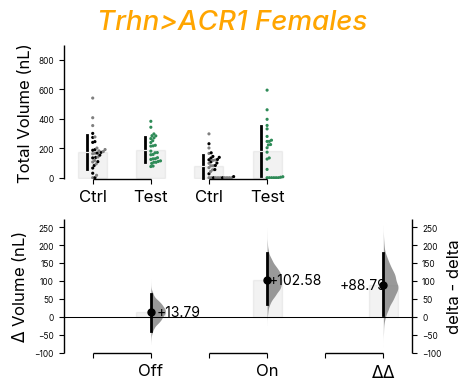

In [ ]:
fTrhACRF_Vcontrast, TrhACRF_Vcontrast = plotcontrast(TrhACRF, 'Volume', 'TrhACRF_Vcontrast', palette = trhacrpalette, title= 'Trhn>ACR1 Females', order=[1, 0, 2])


TrhACRF_Vcontrast_table = make_delta2_results(TrhACRF_Vcontrast, 'w/Trhn-Gal4, w/UAS-ACR1', 'Trhn-Gal4>UAS-ACR1')
# write_results_table(SPREADSHEET_ID, 'Figure S1B Trhn>ACR1 Female', TrhACRF_Vcontrast_table, sheet = 'Figure S1', starting_row = None)


11


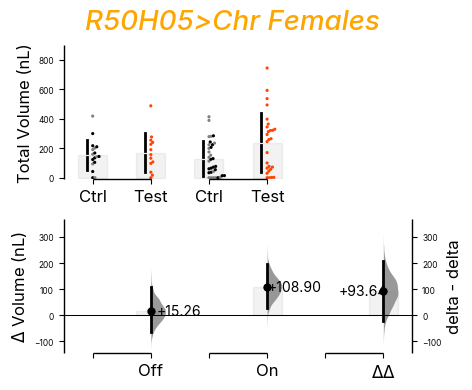

In [ ]:
fR50CsChF_Vcontrast, R50CsChF_Vcontrast = plotcontrast(R50CsChF, 'Volume', 'R50CsChF_Vcontrast', palette = r50cschpalette, title= 'R50H05>Chr Females')
R50CsChF_Vcontrast_table = make_delta2_results(R50CsChF_Vcontrast, 'w/R50H05-Gal4, w/UAS-Chrimson', 'R50H05-Gal4>UAS-Chrimson')
# write_results_table(SPREADSHEET_ID, 'Figure S1C R50H05>Chr Female', R50CsChF_Vcontrast_table, sheet = 'Figure S1', starting_row = None)


In [12]:

R50NoFoodpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/Other conditions/R50NoFood'
R50NoFood_ele = esploco.esploco(R50NoFoodpath, 0, 120)


countLog files found: 

['CountLog_2021-11-12_16-18-50.csv' 'CountLog_2021-11-15_14-25-12.csv'
 'CountLog_2021-12-14_11-56-49.csv' 'CountLog_2021-12-14_14-15-09.csv']

metaData files found: 

['MetaData_2021-11-12_16-18-50.csv' 'MetaData_2021-11-12_16-18-54.csv'
 'MetaData_2021-11-15_14-25-12.csv' 'MetaData_2021-11-15_14-25-16.csv'
 'MetaData_2021-12-14_11-56-49.csv' 'MetaData_2021-12-14_11-56-52.csv'
 'MetaData_2021-12-14_14-15-09.csv' 'MetaData_2021-12-14_14-15-12.csv']
portLocations files found: 

['PortLocations_2021-11-12_16-18-54.csv'
 'PortLocations_2021-11-15_14-25-16.csv'
 'PortLocations_2021-12-14_11-56-52.csv'
 'PortLocations_2021-12-14_14-15-12.csv']

feedLog files found: 

['FeedLog_2021-11-12_16-18-54.csv' 'FeedLog_2021-11-15_14-25-16.csv'
 'FeedLog_2021-12-14_11-56-52.csv' 'FeedLog_2021-12-14_14-15-12.csv']
CountLog_2021-11-12_16-18-50.csv
MetaData_2021-11-12_16-18-50.csv
CountLog_2021-11-15_14-25-12.csv
MetaData_2021-11-15_14-25-12.csv
CountLog_2021-12-14_11-56-49.csv
M

In [13]:
R50NoFood = R50NoFood_ele.resultsDf
R50NoFood['GenoReduced'] = R50NoFood.Genotype.replace({'r50h05-gal4>uas-cschrimson':'R50H05>Chr', 'w1118; uas-cschrimson':'Chr/w', 'w1118; r50h05-gal4':'R50H05/w'}).astype('category').cat.set_categories(['Chr/w', 'R50H05/w', 'R50H05>Chr'], ordered=True)
R50NoFood['Light'] = R50NoFood['Temperature']
r50cschpalette = {'R50H05>Chr':'orangered', 'Chr/w':'gray', 'R50H05/w':'k'}


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 55.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 41.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


43


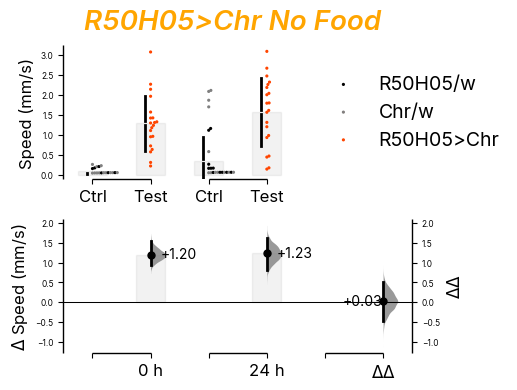

In [ ]:
# fR50CsChFNofood_Speedcontrast = plotcontrast(R50NoFood,  , palette = r50cschpalette, title= 'R50H05>CsCh Fed Speed')

figurepath = imagepath + 'FigureS2/'
c = dabest.load(R50NoFood, x = ['Status', 'GenoReduced'], y =  'averageSpeed_mm/s', delta2 = True, experiment = 'Starvedhrs', x1_level=['Ctrl', 'Test'])
f = c.mean_diff.plot(contrast_bars_kwargs= {'alpha':.05},  swarm_bars_kwargs={'alpha':.05},
                     raw_marker_size=.4, es_marker_size= 5, swarm_desat = 1,color_col='GenoReduced', 
                     custom_palette= r50cschpalette, fig_size=(4.5, 4), swarm_label='Walking\nSpeed (mm/s)')
f.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])

f.axes[0].legend(frameon=False,loc='right', fontsize= 9, markerscale =.5, )

order = [1, 2, 0]
handles = R50NoFood.GenoReduced.unique().to_list()
f.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='right', bbox_to_anchor=[1.3, 0.5], fontsize= 14, markerscale = 1, edgecolor = "white")
leg = f.axes[0].get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color(r50cschpalette['R50H05/w'])
hl_dict['_child1'].set_color(r50cschpalette['Chr/w'])
hl_dict['_child2'].set_color(r50cschpalette['R50H05>Chr'])


if 'Starved' in 'R50H05>Chr Fed Speed':
    bgc = 'steelblue'
else:
    bgc = 'orange'
f.suptitle('R50H05>Chr No Food', font = 'inter', style = 'italic', weight = 'semibold', fontsize = 20,color= bgc, y=.97)
f.axes[1].set_xticklabels(['', '0 h', '', '24 h','', r'$\Delta\Delta$'])
f.axes[1].set_ylabel(r'$\Delta$ Speed (mm/s)')
f.axes[2].set_ylabel(r'$\Delta\Delta$')
f.savefig(figurepath+  'R50CsChNoFood_Speedcontrast' + '.svg')
R50NoFood.to_csv(figurepath+  'R50CsChNoFood_Speedcontrast' + '.csv')

r50CsChNoFood_table = make_delta2_results(c, 'w/R50H05-Gal4, w/UAS-Chrimson', 'R50H05-Gal4>UAS-Chrimson')
# write_results_table(SPREADSHEET_ID, 'Figure S2E R50H05>Chr Walking Speed No Food', r50CsChNoFood_table, sheet = 'Figure S2', starting_row = None)



##### 